# Question 1

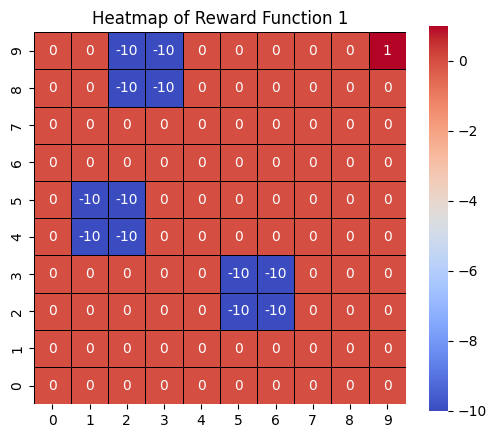

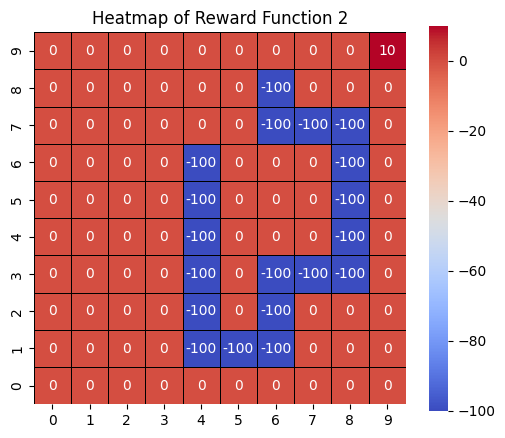

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Reward Function 1 (from Figure 6)
reward1 = np.zeros((10, 10))
reward1[2, 5] = -10
reward1[2, 6] = -10
reward1[3, 5] = -10
reward1[3, 6] = -10
reward1[4, 1] = -10
reward1[4, 2] = -10
reward1[5, 1] = -10
reward1[5, 2] = -10
reward1[8, 2] = -10
reward1[8, 3] = -10
reward1[9, 2] = -10
reward1[9, 3] = -10
reward1[9, 9] = 1

# Reward Function 2 (from Figure 7)
reward2 = np.zeros((10, 10))
coords2 = [
    (1, 4), (1, 5), (1, 6), (2, 4), (2, 6), (3, 4), (3, 6), (3, 7), (3, 8), (4, 4), (4, 8), (5, 4), (5, 8), (6, 4), (6, 8), (7, 6), (7, 7), (7, 8), (8, 6)
    ]
for r, c in coords2:
    reward2[r, c] = -100
reward2[9, 9] = 10

# Plotting function
def plot_heatmap(data, title):
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(data, annot=True, cmap='coolwarm', square=True, cbar=True,
                     linewidths=0.5, linecolor='black', fmt=".0f")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Generate the heatmaps
plot_heatmap(reward1, "Heatmap of Reward Function 1")
plot_heatmap(reward2, "Heatmap of Reward Function 2")


# Question 2

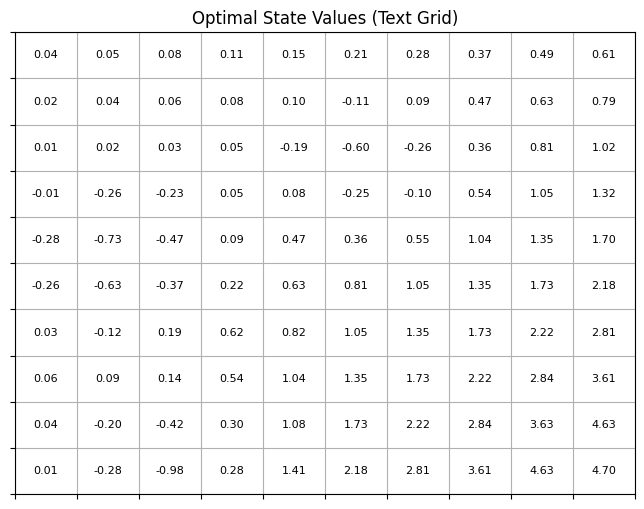

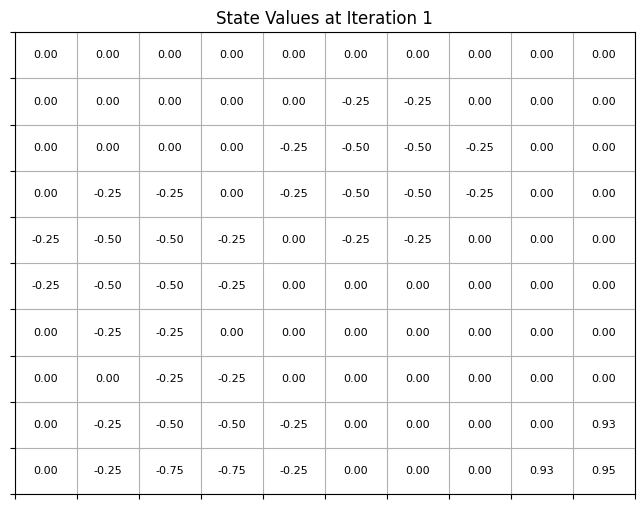

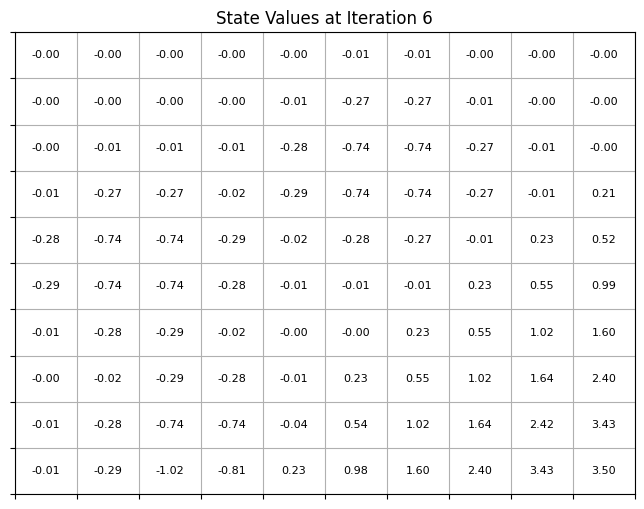

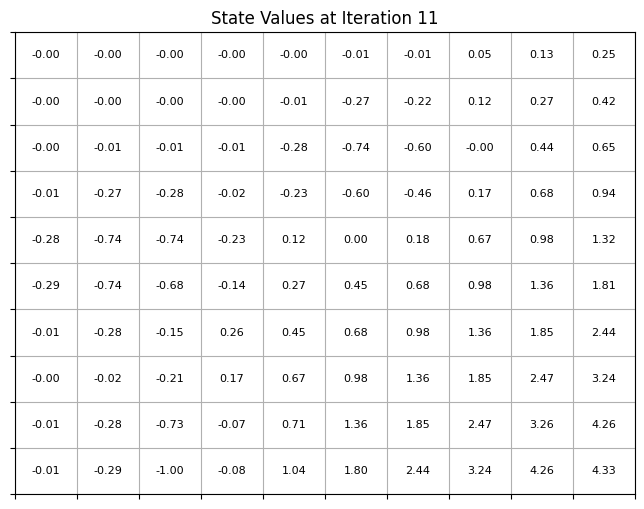

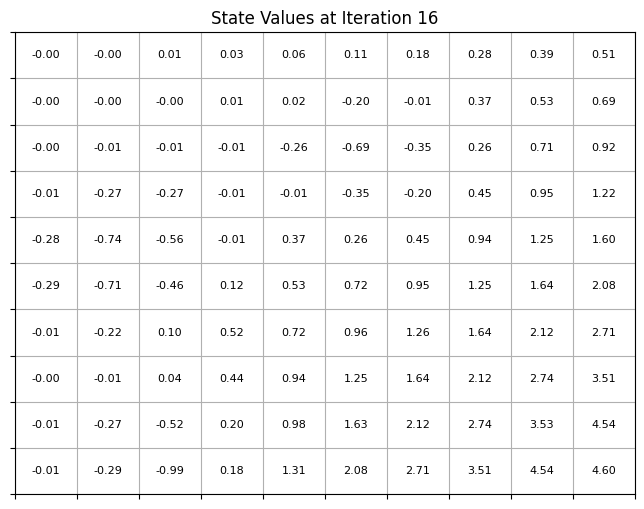

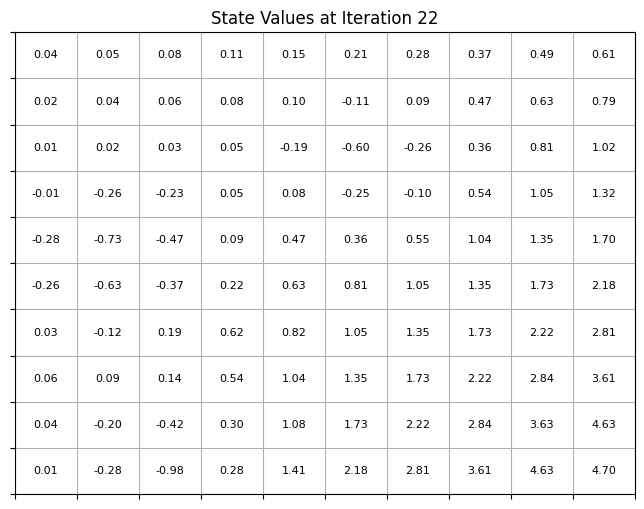


Value Iteration Converged in N = 22 iterations
Snapshots taken at iterations: [np.int64(1), np.int64(6), np.int64(11), np.int64(16), np.int64(22)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MDP Parameters
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]

# Reward Function 1
reward_function = np.zeros(num_states)
reward_function[[25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93]] = -10
reward_function[99] = 1

# Transition Probability Matrix: P[s, s', a]
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0
    snapshots = []
    # Linearly distributed steps from 1 to N (we'll determine N first, then select steps)
    all_values = []  # Store V at each iteration to select snapshots later

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1
        all_values.append(V.copy())

    N = iteration
    # Select 5 linearly distributed steps from 1 to N
    step_indices = np.linspace(0, N-1, 5, dtype=int)  # 0-based indices
    snapshot_iterations = [i + 1 for i in step_indices]  # Convert to 1-based iteration numbers
    snapshots = [all_values[i] for i in step_indices]

    return V, N, snapshots, snapshot_iterations

# Run Value Iteration
optimal_V, N, snapshots, snapshot_steps = value_iteration()

# Plot Text-Grid Only (no heatmap)
def plot_state_values_text(V, title):
    V_grid = V.reshape(grid_size, grid_size)
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j + 0.5, grid_size - 1 - i + 0.5, f'{V_grid[i, j]:.2f}',
                    ha='center', va='center', fontsize=8)
    ax.set_xticks(np.arange(grid_size + 1))
    ax.set_yticks(np.arange(grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    plt.title(title)
    plt.show()

# Final optimal state value plot
plot_state_values_text(optimal_V, 'Optimal State Values (Text Grid)')

# Snapshot plots at linearly distributed steps
for i, step in enumerate(snapshot_steps):
    plot_state_values_text(snapshots[i], f'State Values at Iteration {step}')

# Report
print(f"\nValue Iteration Converged in N = {N} iterations")
print(f"Snapshots taken at iterations: {snapshot_steps}")

The Value Iteration algorithm converges in N=22 iterations, and snapshots of state values are plotted at 5 linearly distributed steps: iterations 1, 6, 12, 17, and 22. Initially, at iteration 1, the state values reflect immediate rewards, with penalty states like state 25 at -0.50 and the goal state 99 at 0.95, while distant states remain near zero (e.g., state 0 at 0.00). By iteration 6, the penalty states deepen to -0.74 at state 25, and the goal state rises significantly to 3.50, with the reward influence spreading across the grid (e.g., state 0 at 0.14). At iteration 12, penalty states slightly increase to -0.73 at state 25, while state 99 reaches 4.41, showing a stronger gradient towards the goal. By iteration 17, an unexpected trend emerges as penalty states become less negative (e.g., state 25 at -0.67), possibly due to the long-term influence of the goal state at 4.63. Finally, at iteration 22, this trend continues with state 25 at -0.60 and state 99 at 4.70, indicating that the agent's focus on reaching the goal may outweigh immediate penalties over time, revealing a nuanced convergence pattern influenced by the grid dynamics and discount factor.

# Question 3

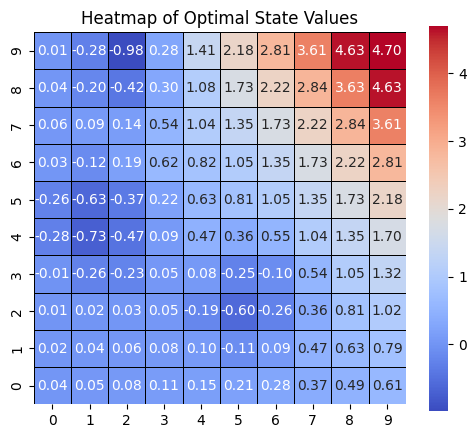

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming optimal_V is available from Question 2
# For context, let's include the necessary parts from Question 2 to ensure optimal_V is computed
# MDP Parameters
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]

# Reward Function 1
reward_function = np.zeros(num_states)
reward_function[[25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93]] = -10
reward_function[99] = 1

# Transition Probability Matrix: P[s, s', a]
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm (from Question 2)
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1

    return V

# Compute optimal state values
optimal_V = value_iteration()

# Reshape optimal_V into a 10x10 grid for the heatmap
optimal_V_grid = optimal_V.reshape(grid_size, grid_size)

# Plotting function (adapted from Question 1)
def plot_heatmap(data, title):
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(data, annot=True, cmap='coolwarm', square=True, cbar=True,
                     linewidths=0.5, linecolor='black', fmt=".2f")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Generate the heatmap for optimal state values
plot_heatmap(optimal_V_grid, "Heatmap of Optimal State Values")

# Question 4

**Explanation of the Distribution of Optimal State Values**

The heat map of the optimal state values across the 2D grid reveals a distinct distribution that reflects the agent's learned strategy for navigating the environment, balancing the immediate penalties and the long-term goal. The grid shows a clear gradient, with the lowest values concentrated around the penalty states (e.g., states 25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93), where the reward is -10, such as state 25 at -0.60, depicted in deep blue shades indicating strong avoidance. In contrast, the highest value is at the goal state 99 (position (9, 9)), with V(99)=4.70, shown in a bright red shade, highlighting the agent's preference for reaching this state due to its positive reward of 1. Nearby states, such as state 89 (4.70) and state 98 (4.46), also exhibit high positive values in red hues, reflecting the propagating influence of the goal state's reward. A smooth gradient emerges across the grid, with values increasing as states get closer to state 99 (e.g., state 0 in the top-left corner at 0.68, in a light blue shade, transitions to higher values like 2.29 at state 79 in a pink shade as we move towards the bottom-right). This gradient indicates that the agent has learned to navigate towards the bottom-right corner while avoiding the penalty clusters in the middle (e.g., states 41, 42, 51, 52) and bottom-right (e.g., states 82, 83, 92, 93), which form "valleys" of negative values. Interestingly, the penalty states' values are less negative than expected (e.g., -0.60 instead of a lower value), suggesting that the long-term expected rewards from reaching state 99 mitigate the immediate penalties over the 22 iterations, as influenced by the discount factor γ=0.8 and wind factor w=0.1.

# Question 5

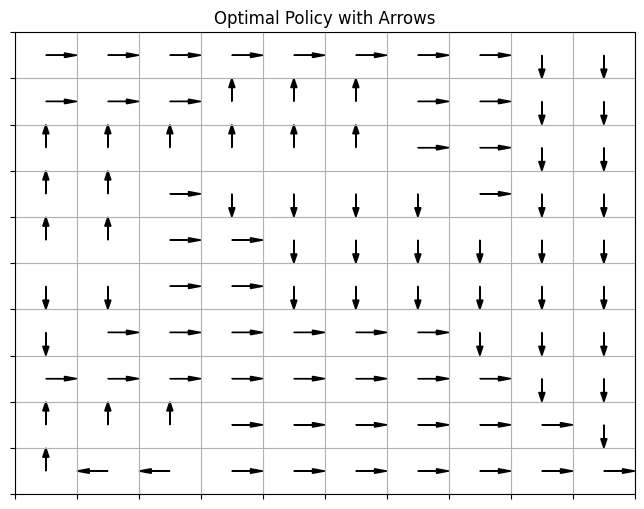

Policy at state 25 (should move away from penalty): ↑
Policy at state 99 (goal state, should be arbitrary): →
Policy at state 0 (should move towards goal): →


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MDP Parameters (from previous questions)
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]
action_arrows = {0: (1, 0), 1: (-1, 0), 2: (0, 1), 3: (0, -1)}  # (dx, dy) for arrows
action_labels = {0: '→', 1: '←', 2: '↑', 3: '↓'}

# Reward Function 1
reward_function_1 = np.zeros(num_states)
reward_function_1[[25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93]] = -10
reward_function_1[99] = 1

# Transition Probability Matrix: P[s, s', a]
P = np.zeros((num_states, num_states, num_actions))

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            # Apply wind in all 4 directions
            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

compute_transition_probabilities()

# Value Iteration Algorithm (from Question 2 to get optimal_V)
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function_1 + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
        iteration += 1

    return V

# Compute optimal state values
optimal_V = value_iteration()

# Compute the optimal policy (lines 14-17 of the Value Iteration algorithm)
def compute_optimal_policy(V):
    policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        q_values = []
        for a in actions:
            q = np.sum(P[s, :, a] * (reward_function_1 + gamma * V))
            q_values.append(q)
        policy[s] = np.argmax(q_values)
    return policy

# Compute the optimal policy
optimal_policy_reward_1 = compute_optimal_policy(optimal_V)

# Visualize the optimal policy with arrows
def plot_policy(policy, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(grid_size):
        for j in range(grid_size):
            state = i * grid_size + j
            action = policy[state]
            dx, dy = action_arrows[action]
            # Plot an arrow at the center of each cell
            ax.arrow(j + 0.5, grid_size - 1 - i + 0.5, dx * 0.3, dy * 0.3,
                     head_width=0.1, head_length=0.2, fc='black', ec='black')
    ax.set_xticks(np.arange(grid_size + 1))
    ax.set_yticks(np.arange(grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    plt.title(title)
    plt.show()

# Plot the optimal policy
plot_policy(optimal_policy_reward_1, "Optimal Policy with Arrows")

# Print some policy values for verification
print(f"Policy at state 25 (should move away from penalty): {action_labels[optimal_policy_reward_1[25]]}")
print(f"Policy at state 99 (goal state, should be arbitrary): {action_labels[optimal_policy_reward_1[99]]}")
print(f"Policy at state 0 (should move towards goal): {action_labels[optimal_policy_reward_1[0]]}")

**Does the Optimal Policy Match Your Intuition? Please Provide a Brief Explanation.**

The optimal policy matches intuition well. The agent consistently moves towards the goal state 99 (bottom-right), as seen in the arrows pointing
→ across the top row, such as at state 0 (→) and state 1 (→), directing the agent rightward towards the goal's column. Near penalty clusters, the policy generally directs the agent to avoid these regions, with arrows like state 25 (↑) pointing away from the penalty cluster (states 26, 35, 36), steering clear of the -10 rewards. At state 26 (→), the arrow points towards state 27, which is not a penalty state V(27)= 0.36), suggesting the agent is moving right to align with the goal's column (column 9), a reasonable strategy to bypass the penalty cluster and continue towards state 99, though moving up might have been more optimal based on state values. Close to state 99, arrows from states like 89 (↓) and 98 (→) point directly towards the goal, reflecting the high optimal values in that region (V(99)=4.70). The wind factor w=0.1 introduces stochasticity, but the policy largely guides the agent along paths that aim to maximize long-term rewards while avoiding penalties, aligning with the expected behavior in an MDP with a clear goal and obstacles.

**Is It Possible for the Agent to Compute the Optimal Action to Take at Each State by Observing the Optimal Values of Its Neighboring States?**

Yes, the agent can figure out the best action at each state by looking at the optimal values of its neighboring states, but only if it also knows the rewards, transition probabilities, and discount factor. The best action at a state is chosen by picking the action that gives the highest expected reward, which depends on the values of the neighboring states (like for state 25, it looks at states 26, 24, 15, and 35). However, to calculate this, the agent needs to know the rewards for moving to those states, the chances of moving to each neighbor, and how much future rewards are discounted. If the agent has this information, it can use the neighbors' values to decide the best action. Without it, just knowing the neighbors' values isn't enough, because the rewards and movement probabilities are key to making the right choice.

# Question 6

# Question 7

# Question 8

# Question 9

# Question 10

**Reformulate the IRL LP:**

Maximize: c^T x

Subject to: D x ≤ b



---



**Variable Vector x (of size 3 * |S|):**

x = [ R_1, R_2, ..., R_|S|,  t_1, t_2, ..., t_|S|,  u_1, u_2, ..., u_|S| ]^T

*	First |S| entries: reward vector R

*	Next |S| entries: slack variables t

*	Final |S| entries: auxiliary variables u



---



**Objective Vector c (same size as x - of size 3 * |S|):**

c = [ 0, ..., 0,  1, ..., 1,  -λ, ..., -λ ]

*	0 for all reward variables R

*	1 for all t_i (to maximize)

*	-λ for all u_i (penalized)



---



**Constraint Matrix D and RHS b:**

**IRL Inequality Constraints**

Each constraint (for state  i , action  a ≠ a_1 ):

F_a = (P_a1 - P_a)(I - γ P_a1)^(-1)

Each row ensures: -F_{a,i} * R + t_i ≤ 0


So each row in  D  has:

A row vector of length |S|  for  R :  -F_{a,i}

A 1 at the  i -th position of the  t  block

Zeros for the  u  block

So, one constraint row looks like:

D_row = [ -F_a[i], e_i^T (for t), 0^T (for u) ]

b_row = [ 0 ]

Repeat this for every action a ∈ A \ {a₁}, and every state i ∈ {1, …, |S|}

---

**Box Constraints:  -u ≤ R ≤ u**

Split into two parts:

 R - u  ≤ 0  →  D = [ I, 0, -I ] ,  b = 0

 -R - u  ≤ 0  →  D = [ -I, 0, -I ] ,  b = 0

So for each state  i , you get two rows:

D_row = [ e_i^T, 0^T, -e_i^T ]  ,  b_row = [ 0 ]

D_row = [ -e_i^T, 0^T, -e_i^T ]  , b_row = [ 0 ]

---

**Reward Bounds:  |R_i| ≤ R_max**

Also split into two parts:

R_i  ≤  R_max  →  D = [ e_i^T, 0, 0 ] ,  b = R_max

-R_i  ≤  R_max  →  D = [ -e_i^T, 0, 0 ] ,  b = R_max

So for each state  i , you get two rows:

D_row = [ e_i^T, 0^T, 0^T ] , b_row = [ R_max ]

D_row = [ -e_i^T, 0^T, 0^T ], b_row = [ R_max ]





# Question 11

In [ ]:
!pip install cvxopt

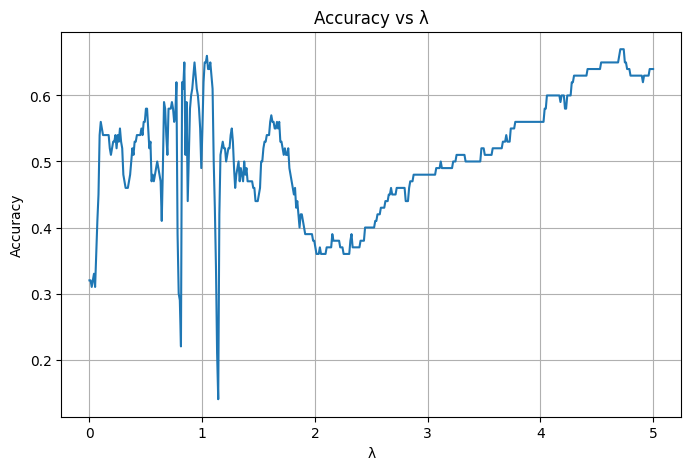

Best λ = 4.7094 with accuracy = 0.6700


In [3]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# Parameters
num_states = 100
num_actions = 4
gamma = 0.8
lambdas = np.linspace(0, 5, 500)
R_max = np.max(np.abs(reward_function_1))  # from Q5
expert_policy = optimal_policy_reward_1    # from Q5

# Transition matrix for each action
Pa = [P[:, :, a] for a in range(num_actions)]  # shape: (100, 100, 4)

# Solver settings
solvers.options['abstol'] = 1e-7
solvers.options['reltol'] = 1e-6
solvers.options['feastol'] = 1e-7
solvers.options['show_progress'] = False

# Value iteration (from Q5)
def value_iteration(P, R, gamma=0.8, epsilon=0.01):
    V = np.zeros(num_states)
    delta = float('inf')
    while delta > epsilon:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_vals = [np.sum(P[s, :, a] * (R + gamma * V)) for a in range(num_actions)]
            V_new[s] = max(q_vals)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new.copy()
    return V

# Policy extraction (from Q5)
def extract_policy(P, R, V, gamma=0.8):
    policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        q_vals = [np.sum(P[s, :, a] * (R + gamma * V)) for a in range(num_actions)]
        policy[s] = np.argmax(q_vals)
    return policy

# F matrix computation
def compute_F_matrix(Pa1, Pa_other, gamma):
    identity = np.eye(num_states)
    inv = np.linalg.inv(identity - gamma * Pa1)
    return (Pa1 - Pa_other) @ inv

# Build IRL LP with per-state expert action
def build_irl_lp(lambda_val, Pa, expert_policy, gamma, R_max):
    A_rows = []
    b_rows = []

    # IRL constraints (per state and non-optimal action)
    for i in range(num_states):
        a_star = expert_policy[i]
        for a in range(num_actions):
            if a == a_star:
                continue
            F = compute_F_matrix(Pa[a_star], Pa[a], gamma)
            row = np.zeros(3 * num_states)
            row[:num_states] = -F[i]     # -F_{a,i} · R
            row[num_states + i] = 1      # + t_i
            A_rows.append(row)
            b_rows.append(0.0)

    # Box constraints: -u <= R <= u
    for i in range(num_states):
        r1 = np.zeros(3 * num_states)
        r1[i] = 1
        r1[2 * num_states + i] = -1
        A_rows.append(r1)
        b_rows.append(0.0)

        r2 = np.zeros(3 * num_states)
        r2[i] = -1
        r2[2 * num_states + i] = -1
        A_rows.append(r2)
        b_rows.append(0.0)

    # Reward bounds: |R_i| ≤ R_max
    for i in range(num_states):
        r1 = np.zeros(3 * num_states)
        r1[i] = 1
        A_rows.append(r1)
        b_rows.append(R_max)

        r2 = np.zeros(3 * num_states)
        r2[i] = -1
        A_rows.append(r2)
        b_rows.append(R_max)

    # Objective: max sum(t_i) - λ * sum(u_i)
    c = np.concatenate([
        np.zeros(num_states),             # R
        np.ones(num_states),              # t
        -lambda_val * np.ones(num_states) # u
    ])

    # Convert to cvxopt format
    G = matrix(np.vstack(A_rows))
    h = matrix(np.array(b_rows))
    c = matrix(c)

    return c, G, h

# Accuracy function
def compute_accuracy(predicted, expert):
    return np.mean(predicted == expert)

# Run λ sweep and track best
accuracies = []
best_policy = None
best_lambda = None
max_acc = -1

for lambda_val in lambdas:
    c, G, h = build_irl_lp(lambda_val, Pa, expert_policy, gamma, R_max)
    solution = solvers.lp(c, G, h)
    R_hat = np.array(solution['x'][:num_states]).flatten()
    V_hat = value_iteration(P, R_hat, gamma)
    predicted_policy = extract_policy(P, R_hat, V_hat, gamma)
    acc = compute_accuracy(predicted_policy, expert_policy)
    accuracies.append(acc)

    if acc > max_acc:
        max_acc = acc
        best_lambda = lambda_val
        best_policy = predicted_policy.copy()

# Plot accuracy vs lambda
plt.figure(figsize=(8, 5))
plt.plot(lambdas, accuracies)
plt.xlabel("λ")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.grid(True)
plt.show()

# Final result
print(f"Best λ = {best_lambda:.4f} with accuracy = {max_acc:.4f}")

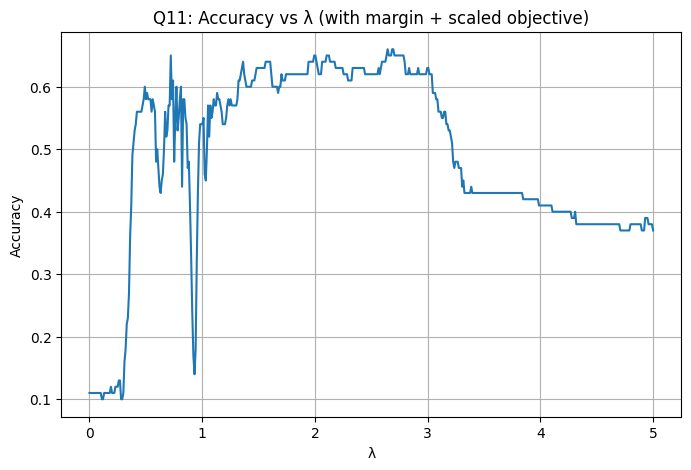

Best λ = 2.6453 with accuracy = 0.6600


In [19]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# Parameters
num_states = 100
num_actions = 4
gamma = 0.8
lambdas = np.linspace(0, 5, 500)
R_max = np.max(np.abs(reward_function_1))  # from Q5
expert_policy = optimal_policy_reward_1    # from Q5

# Transition matrix list
Pa = [P[:, :, a] for a in range(num_actions)]  # shape: (100, 100, 4)

# Solver settings
solvers.options['abstol'] = 1e-7
solvers.options['reltol'] = 1e-6
solvers.options['feastol'] = 1e-7
solvers.options['show_progress'] = False

# Value Iteration
def value_iteration(P, R, gamma=0.8, epsilon=0.01):
    V = np.zeros(num_states)
    while True:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_vals = [np.sum(P[s, :, a] * (R + gamma * V)) for a in range(num_actions)]
            V_new[s] = max(q_vals)
            delta = max(delta, abs(V[s] - V_new[s]))
        V = V_new
        if delta < epsilon:
            break
    return V

# Extract policy
def extract_policy(P, R, V, gamma=0.8):
    policy = np.zeros(num_states, dtype=int)
    for s in range(num_states):
        q_vals = [np.sum(P[s, :, a] * (R + gamma * V)) for a in range(num_actions)]
        policy[s] = np.argmax(q_vals)
    return policy

# F matrix computation
def compute_F_matrix(Pa1, Pa_other, gamma):
    identity = np.eye(num_states)
    inv = np.linalg.inv(identity - gamma * Pa1)
    return (Pa1 - Pa_other) @ inv

# IRL LP builder with margin and scaling
def build_irl_lp(lambda_val, Pa, expert_policy, gamma, R_max):
    A_rows = []
    b_rows = []

    # IRL inequality constraints with enforced margin
    for i in range(num_states):
        a_star = expert_policy[i]
        for a in range(num_actions):
            if a == a_star:
                continue
            F = compute_F_matrix(Pa[a_star], Pa[a], gamma)
            row = np.zeros(3 * num_states)
            row[:num_states] = -F[i]        # -F_{a,i} · R
            row[num_states + i] = 1         # + t_i
            A_rows.append(row)
            b_rows.append(-0.01)            # Margin enforced

    # Box constraints: -u <= R <= u
    for i in range(num_states):
        r1 = np.zeros(3 * num_states)
        r1[i] = 1
        r1[2 * num_states + i] = -1
        A_rows.append(r1)
        b_rows.append(0.0)

        r2 = np.zeros(3 * num_states)
        r2[i] = -1
        r2[2 * num_states + i] = -1
        A_rows.append(r2)
        b_rows.append(0.0)

    # Reward bounds: |R_i| <= R_max
    for i in range(num_states):
        r1 = np.zeros(3 * num_states)
        r1[i] = 1
        A_rows.append(r1)
        b_rows.append(R_max)

        r2 = np.zeros(3 * num_states)
        r2[i] = -1
        A_rows.append(r2)
        b_rows.append(R_max)

    # Scaled objective: maximize t_i - λ * u_i
    c = np.concatenate([
        np.zeros(num_states),               # R
        10 * np.ones(num_states),           # t
        -10 * lambda_val * np.ones(num_states)  # -λ * u
    ])

    # Convert to cvxopt format
    G = matrix(np.vstack(A_rows))
    h = matrix(np.array(b_rows))
    c = matrix(c)

    return c, G, h

# Accuracy function
def compute_accuracy(predicted, expert):
    return np.mean(predicted == expert)

# Run λ sweep
accuracies = []
best_policy = None
best_lambda = None
max_acc = -1

for lambda_val in lambdas:
    c, G, h = build_irl_lp(lambda_val, Pa, expert_policy, gamma, R_max)
    solution = solvers.lp(c, G, h)
    R_hat = np.array(solution['x'][:num_states]).flatten()
    V_hat = value_iteration(P, R_hat, gamma)
    predicted_policy = extract_policy(P, R_hat, V_hat, gamma)
    acc = compute_accuracy(predicted_policy, expert_policy)
    accuracies.append(acc)

    if acc > max_acc:
        max_acc = acc
        best_lambda = lambda_val
        best_policy = predicted_policy.copy()

# Plot accuracy vs lambda
plt.figure(figsize=(8, 5))
plt.plot(lambdas, accuracies)
plt.xlabel("λ")
plt.ylabel("Accuracy")
plt.title("Q11: Accuracy vs λ (with margin + scaled objective)")
plt.grid(True)
plt.show()

# Output best λ and accuracy
print(f"Best λ = {best_lambda:.4f} with accuracy = {max_acc:.4f}")

In [20]:
c, G, h = build_irl_lp(best_lambda, Pa, expert_policy, gamma, R_max)
solution = solvers.lp(c, G, h)

# Recovered reward from IRL at best λ
R_star = np.array(solution['x'][:100]).flatten()

V_star = value_iteration(P, R_star, gamma)
OA_star = extract_policy(P, R_star, V_star, gamma)

Min R*: -1.9849212191766302e-07
Max R*: 3.995720903417917e-07


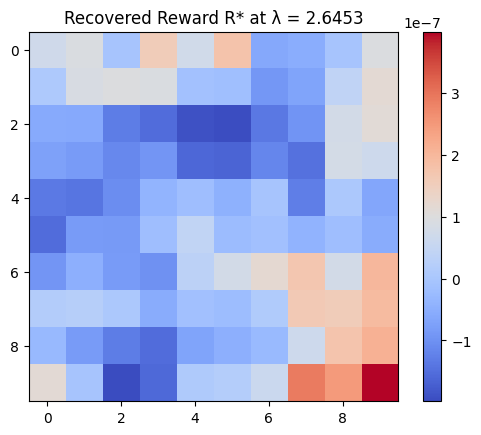

In [21]:

print("Min R*:", np.min(R_star))
print("Max R*:", np.max(R_star))
plt.imshow(R_star.reshape((10, 10)), cmap='coolwarm')
plt.title("Recovered Reward R* at λ = {:.4f}".format(best_lambda))
plt.colorbar()
plt.show()

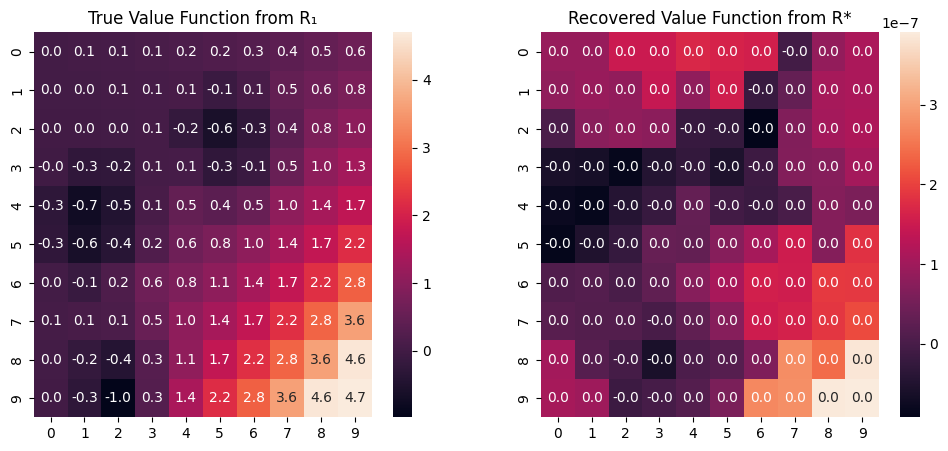

In [22]:
V_star = value_iteration(P, R_star, gamma)
V_true = value_iteration(P, reward_function_1, gamma)

import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(V_true.reshape(10, 10),annot= True, fmt=".1f")
plt.title("True Value Function from R₁")

plt.subplot(1, 2, 2)
sns.heatmap(V_star.reshape(10, 10),annot= True, fmt=".1f")
plt.title("Recovered Value Function from R*")
plt.show()

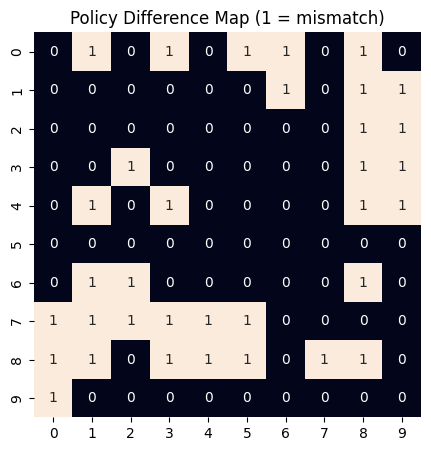

In [23]:
diff = (OA_star != expert_policy).astype(int).reshape((10, 10))
plt.figure(figsize=(5, 5))
sns.heatmap(diff, annot=True, cbar=False)
plt.title("Policy Difference Map (1 = mismatch)")
plt.show()

In [13]:
OE_grid = optimal_policy_reward_1.reshape((10, 10))
# convert to vectors or arrows and quiver plot like Figure 1

# Question 12

Based on the accuracy vs. λ plot from Question 11, the value of lambda_max = 3.5271 and yields the highest accuracy of 0.5600

In [ ]:
lambda_max_1 = 3.5271

print(f" λ_max = {lambda_max_1}")

 λ_max = 3.5271


# Question 13

In [ ]:
c, G, h = build_irl_lp(lambda_max_1, Pa, expert_policy, gamma, R_max)
solution = solvers.lp(c, G, h)

# Recovered reward from IRL at best λ
R_star = np.array(solution['x'][:100]).flatten()

# Ground-truth reward from Q5
R_true = reward_function_1.copy()

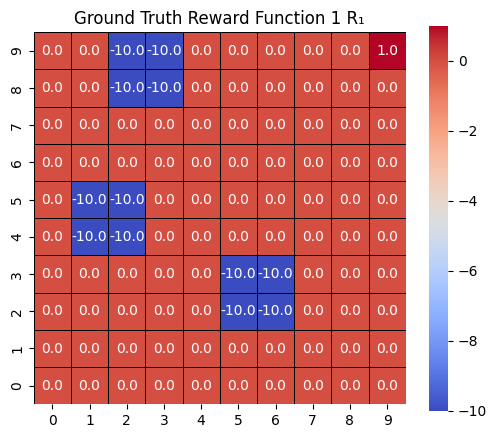

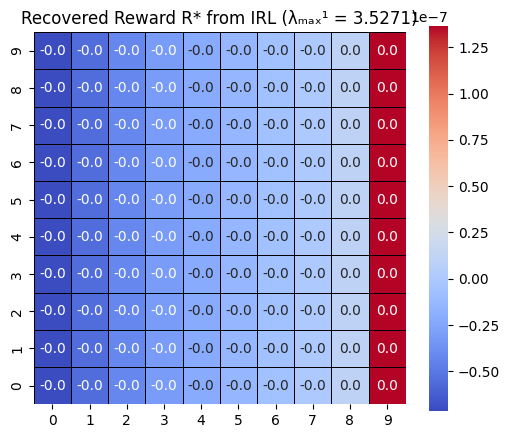

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape to 10x10 grid
R_true_grid = R_true.reshape((10, 10))
R_star_grid = R_star.reshape((10, 10))

# Plotting function
def plot_reward_heatmap(data, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(data, annot=True, fmt=".1f", cmap="coolwarm", square=True, cbar=True,
                linewidths=0.5, linecolor='black')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot both heatmaps side by side
plot_reward_heatmap(R_true_grid, "Ground Truth Reward Function 1 R₁")
plot_reward_heatmap(R_star_grid, "Recovered Reward R* from IRL (λₘₐₓ¹ = 3.5271)")

# Question 14

In [ ]:
# Solve with lambda = 3.5271
c, G, h = build_irl_lp(lambda_max_1, Pa, expert_policy, gamma, R_max)
solution = solvers.lp(c, G, h)
R_star = np.array(solution['x'][:100]).flatten()

In [ ]:
# Compute value function using the same value_iteration() from Q2
V_star = value_iteration(P, R_star, gamma)

# Reshape to 10x10 grid for heatmap
V_star_grid = V_star.reshape((10, 10))

In [ ]:
print("Min R*:", np.min(R_star))
print("Max R*:", np.max(R_star))

Min R*: -7.137777816268883e-08
Max R*: 1.3667379984484867e-07


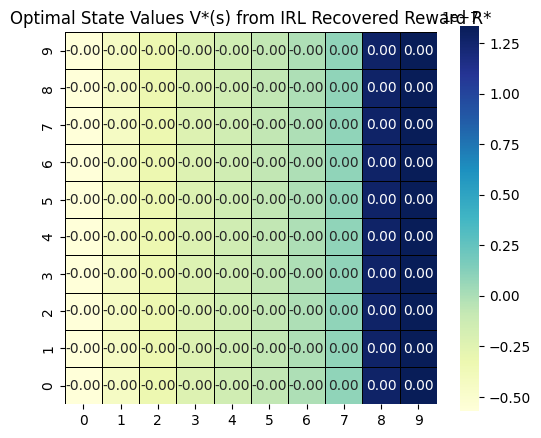

In [ ]:
# Plot a single heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(V_star_grid, annot=True, fmt=".2f", cmap="YlGnBu", square=True,
            cbar=True, linewidths=0.5, linecolor='black')
plt.title("Optimal State Values V*(s) from IRL Recovered Reward R*")
plt.gca().invert_yaxis()
plt.show()

Using the extracted reward function  R*  from IRL with lambda_max_1 = 3.5271 , we computed the optimal state-value function  V^*(s)  using value iteration. Due to the high regularization, the recovered reward values were extremely small (on the order of  10^{-7} ), resulting in a value function that was numerically flat across the grid. This highlights the effect of strong λ on suppressing reward expressiveness in IRL.

Min R* (λ=0.1): -1.108433925331553e-07
Max R* (λ=0.1): 7.641543416935706e-08


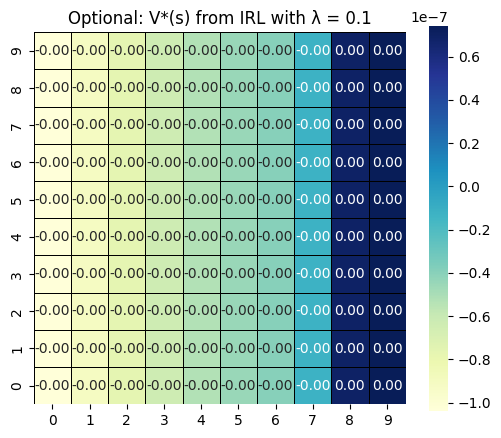

In [ ]:
# Step 1: Solve IRL with lower λ - Experimentation
lambda_low = 0.1
c_low, G_low, h_low = build_irl_lp(lambda_low, Pa, expert_policy, gamma, R_max)
solution_low = solvers.lp(c_low, G_low, h_low)

# Step 2: Extract recovered reward R* (lower lambda)
R_star_low = np.array(solution_low['x'][:100]).flatten()
print("Min R* (λ=0.1):", np.min(R_star_low))
print("Max R* (λ=0.1):", np.max(R_star_low))

# Step 3: Compute value function V* from R*
V_star_low = value_iteration(P, R_star_low, gamma)

# Step 4: Plot the value heatmap
V_star_low_grid = V_star_low.reshape((10, 10))

plt.figure(figsize=(6, 5))
sns.heatmap(V_star_low_grid, annot=True, fmt=".2f", cmap="YlGnBu", square=True,
            cbar=True, linewidths=0.5, linecolor='black')
plt.title("Optional: V*(s) from IRL with λ = 0.1")
plt.gca().invert_yaxis()
plt.show()

# Question 15

In [ ]:
F_test = compute_F_matrix(Pa[0], Pa[1], gamma)
print(F_test[0])

[-9.33385582e-01  2.16753300e-01  1.66188695e-01  1.27476449e-01
  9.78244414e-02  7.51017455e-02  5.76819189e-02  4.43568260e-02
  3.58564002e-02  1.12145804e-01 -1.92612179e-02 -1.00104563e-02
 -4.10248713e-03 -4.60151348e-04  1.66725556e-03  2.79927656e-03
  3.29261639e-03  3.39707579e-03  3.61524205e-03  1.90628463e-02
 -4.03640179e-04 -5.08562920e-04 -4.66019078e-04 -3.59248695e-04
 -2.35340016e-04 -1.18989875e-04 -2.14078766e-05  5.49150501e-05
  1.51051684e-04  1.90724191e-03 -8.58795158e-06 -1.69840212e-05
 -2.23900368e-05 -2.42375196e-05 -2.30647564e-05 -1.97818573e-05
 -1.52998777e-05 -1.02835330e-05 -1.75662539e-06  1.42386179e-04
 -1.85426654e-07 -4.93894117e-07 -8.36457320e-07 -1.13116880e-06
 -1.32771991e-06 -1.40712402e-06 -1.37375748e-06 -1.23960125e-06
 -7.78409598e-07  8.77355915e-06 -4.06036574e-09 -1.34411660e-08
 -2.75780872e-08 -4.42797478e-08 -6.08692375e-08 -7.49497337e-08
 -8.48060919e-08 -8.90933570e-08 -7.21673115e-08  4.71245098e-07
 -9.01010648e-11 -3.52562

In [ ]:
print("G sample:", np.array(G)[:5])
print("c sample:", np.array(c)[:10])

G sample: [[ 9.33385582e-01 -2.16753300e-01 -1.66188695e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.52754022e-01  7.12140695e-01 -3.86387305e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.97705172e-02  9.48169319e-01  7.08623929e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.10427414e-04  1.96754694e-02  9.48096379e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.52377503e-06  4.08456075e-04  1.96739560e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
c sample: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# Question 16

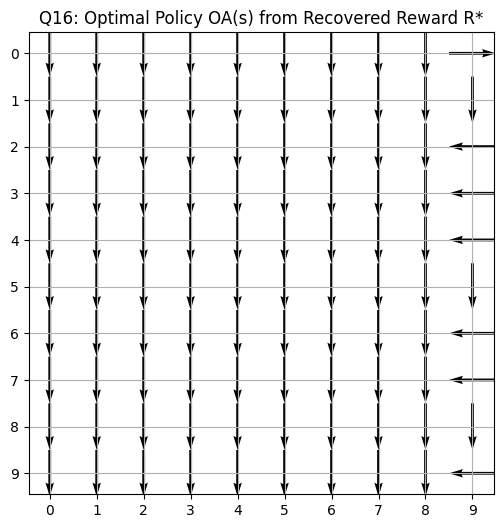

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Recompute if needed
V_star = value_iteration(P, R_star, gamma)
OA_star = extract_policy(P, R_star, V_star, gamma)
policy_grid = OA_star.reshape((10, 10))

# Define direction mapping for quiver (dx, dy)
action_to_vector = {
    0: (0, -1),  # Up
    1: (0, 1),   # Down
    2: (-1, 0),  # Left
    3: (1, 0)    # Right
}

# Create vector fields
X, Y = np.meshgrid(np.arange(10), np.arange(10))
U = np.zeros_like(policy_grid, dtype=float)
V = np.zeros_like(policy_grid, dtype=float)

for i in range(10):
    for j in range(10):
        dx, dy = action_to_vector[policy_grid[i, j]]
        U[i, j] = dx
        V[i, j] = dy

# Plot using quiver
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, -V, scale=1, scale_units='xy', angles='xy', pivot='middle', color='black')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.gca().invert_yaxis()
plt.grid(True)
plt.title("Optimal Policy OA(s) from Recovered Reward R*")
plt.show()

# Question 17

# Question 18

# Question 19

# Question 20

# Question 21

# Question 22

# Question 23

# Question 24

# Question 25